# It's raining stats & dots
## Weston Park weather station, Sheffield (1883 - today)

### Introduction

Sheffield's Weston Park weather station has been continuously collecting weather data since 1883. It collects and publishes monthly weather data on temperature, rainfall, hours of sun and air frost. Represented in the data as:

| Column name | Column description |
| --- | --- |
| `yyyy` |  Year the data was collected |
| `month` | Month the data was collected (*numerical value e.g. January = 1*)  |
| `tmin-degC` |  Mean daily maximum temperature |
| `tmax-degC` | Mean daily minimum temperature |
| `af-days` | Days of air frost |
| `rain-mm` | Total rainfall |
| `sun-hrs` | Total sunshine duration (*since 1929*) |

Data downloaded on 25/10/2024 from [Met Office Historic station data](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data)

In [99]:
# import relevant libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import calendar
%config InlineBackend.figure_format = 'retina'

# load data into the dataframe
data_source = 'sheffield-weather-data.csv'
wdata = pd.read_csv(data_source)

# all columns contain numeric data and require being in a numeic data type for subsequent analysis
for column_name in wdata.columns.values:
    wdata[column_name] = wdata[column_name].apply(pd.to_numeric)

## DATA TRANFORMATIONS
# drop unnecessary columns
wdata = wdata.drop(columns=['af-days', 'tmax-degC','tmin-degC','sun-hrs'])

# describe the data
wdata.describe()

,yyyy,month,rain-mm
count,1701.000000,1701.000000,1701.000000
mean,1953.375661,6.492063,67.104879
std,40.931858,3.450758,38.558515
min,1883.000000,1.000000,0.600000
25%,1918.000000,3.000000,39.300000
50%,1953.000000,6.000000,60.300000
75%,1989.000000,9.000000,87.900000
max,2024.000000,12.000000,285.600000


### Exploring rainfall

From a haar or a mist, a drizzle to a deluge, a spit, sprinkle and a splutter there are many shades of rain and as much as a fascination with rain and weather falls into cliche - it does keep us on our toes. What patterns can we observe from the weather station data.

In [100]:
rain_data = wdata['rain-mm'].describe()
median = rain_data['50%'] # wdata['rain-mm'].median()
mean = rain_data['mean'] # wdata['rain-mm'].mean()
interquartile_range = rain_data['75%']-rain_data['25%'] # wdata['rain-mm'].quantile(0.75) - wdata['rain-mm'].quantile(0.25)
std = rain_data['std'] # wdata['rain-mm'].std()

all_rain_data = [
    '|%s|%s|' % ('Median', round(median,2)),
    '|%s|%s|' % ('Mean', round(mean,2)),
    '|%s|%s|' % ('Standard deviation', round(std,2)),
    '|%s|%s|' % ('Interquartile range', round(interquartile_range,2)),
    '|%s|%s|' % ('Minimum', round(rain_data['min'],2)),
    '|%s|%s|' % ('Maximum', round(rain_data['max'],2)),
]

# display stat data in md table
display(Markdown("""
**Rainfall stats**
| Statistic | Value (mm) |
| --- | --- | 
%s\n
 Calculated from %s datapoints, taken over the years %s to %s""" % (
    '\n'.join(all_rain_data),
    int(rain_data['count']),
    wdata['yyyy'].iloc[0],
    wdata['yyyy'].iloc[-1]     
)))


**Rainfall stats**
| Statistic | Value (mm) |
| --- | --- | 
|Median|60.3|
|Mean|67.1|
|Standard deviation|38.56|
|Interquartile range|48.6|
|Minimum|0.6|
|Maximum|285.6|

 Calculated from 1701 datapoints, taken over the years 1883 to 2024

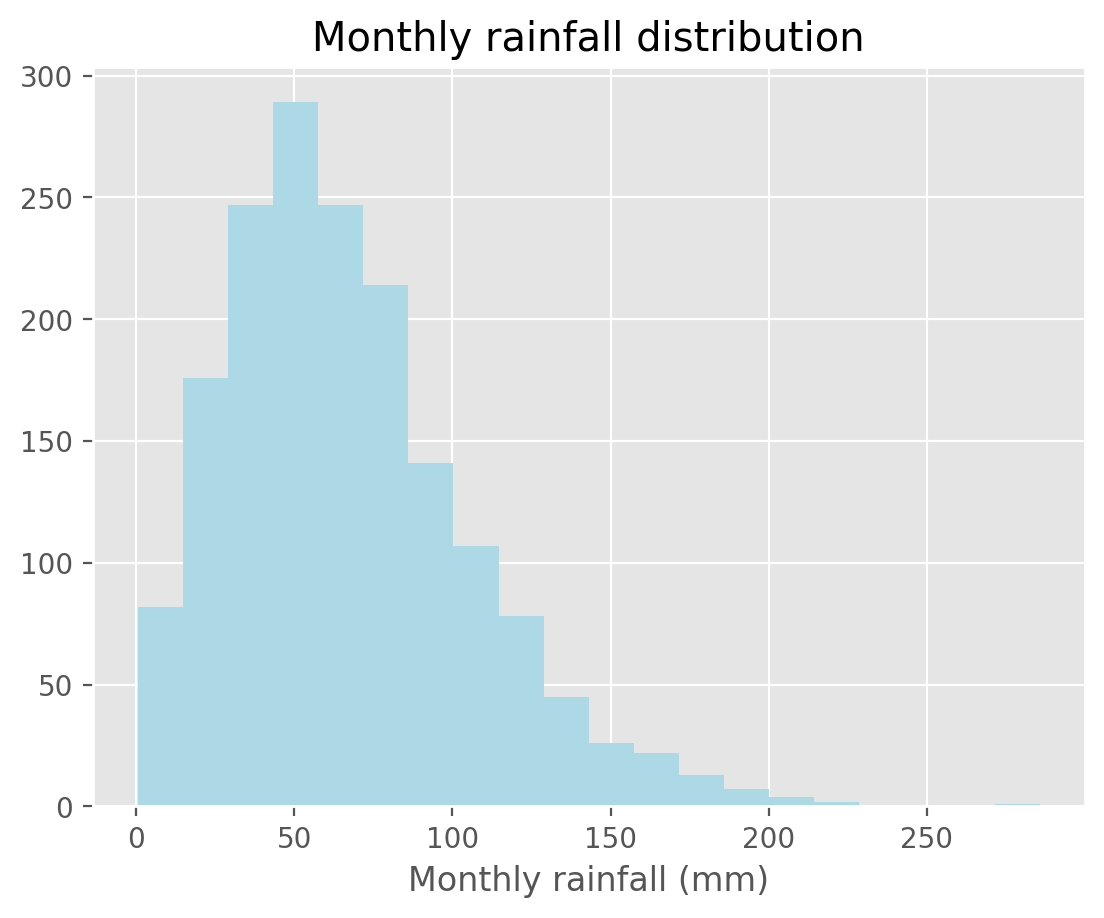

In [101]:
# plotting a historgram to show distribution
plt.style.use('ggplot')
plt.hist(wdata['rain-mm'], bins = 20, color='lightblue')
plt.title('Monthly rainfall distribution')
plt.xlabel('Monthly rainfall (mm)')
plt.show()

The *Monthly rainfall distribution* histogram shows a bell shape with a right skew. Our median (μ) value is 60.3 mm and mean (x̅) is 67.1 mm, however we have a maximum of 285.6 mm. Unsuprisingly this right skew depicts the more extreme months of rainfull; the flooding and particularly wet months.

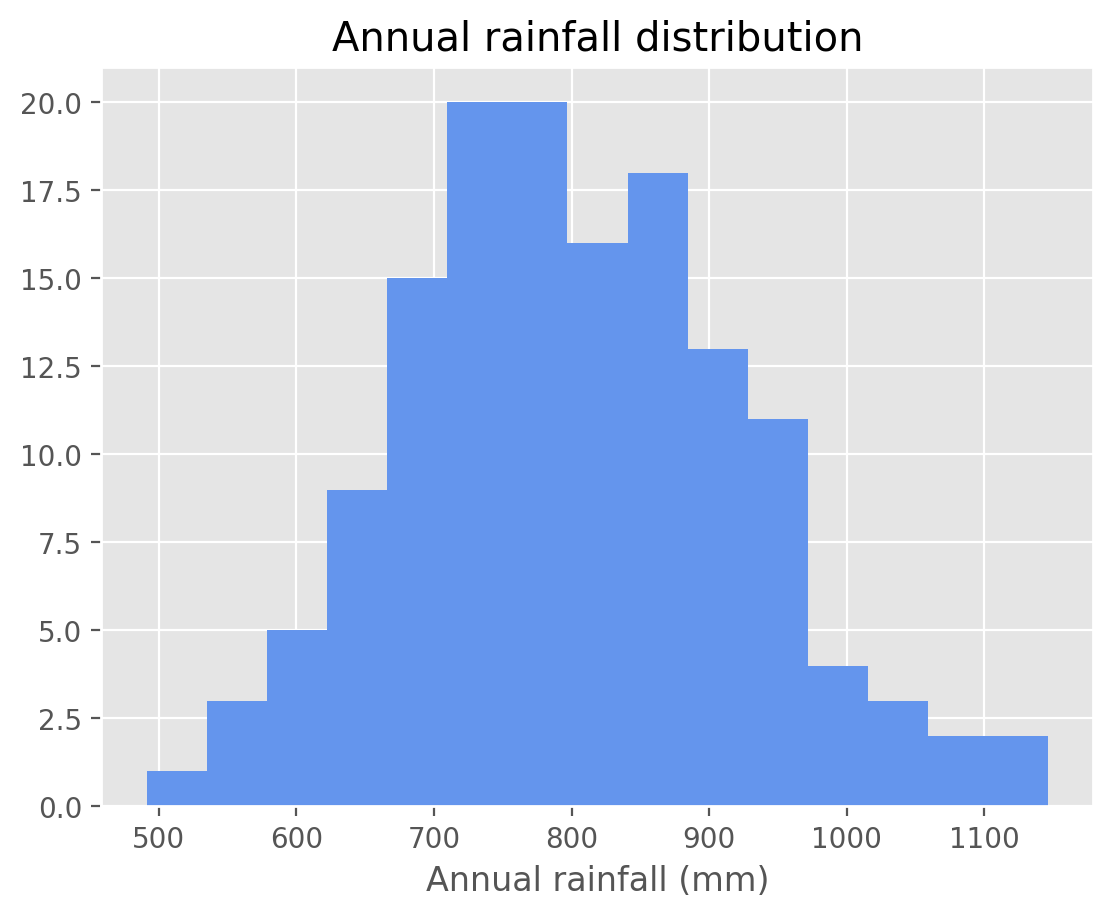

In [102]:
# creating a dataframe for the total annual rainfall, by .groupby and .sum
a_wdata = wdata[['yyyy','rain-mm']].groupby('yyyy', as_index=False).sum()

# plotting a histogram to show distribution
plt.style.use('ggplot')
plt.hist(a_wdata['rain-mm'], bins = 15, color='cornflowerblue')
plt.title('Annual rainfall distribution')
plt.xlabel('Annual rainfall (mm)')
plt.show()

Interestingly, when we look at the same data grouped by *year* in the *Annual rainfall distribution* histogram, we see a bell shape with a *slight* right skew, that appears to have a much more normal distribution than the first graph. 
What this could suggest is that when looking at rainfall over the course of a whole year the affect of more extreme rainfall is somewhat normalised.

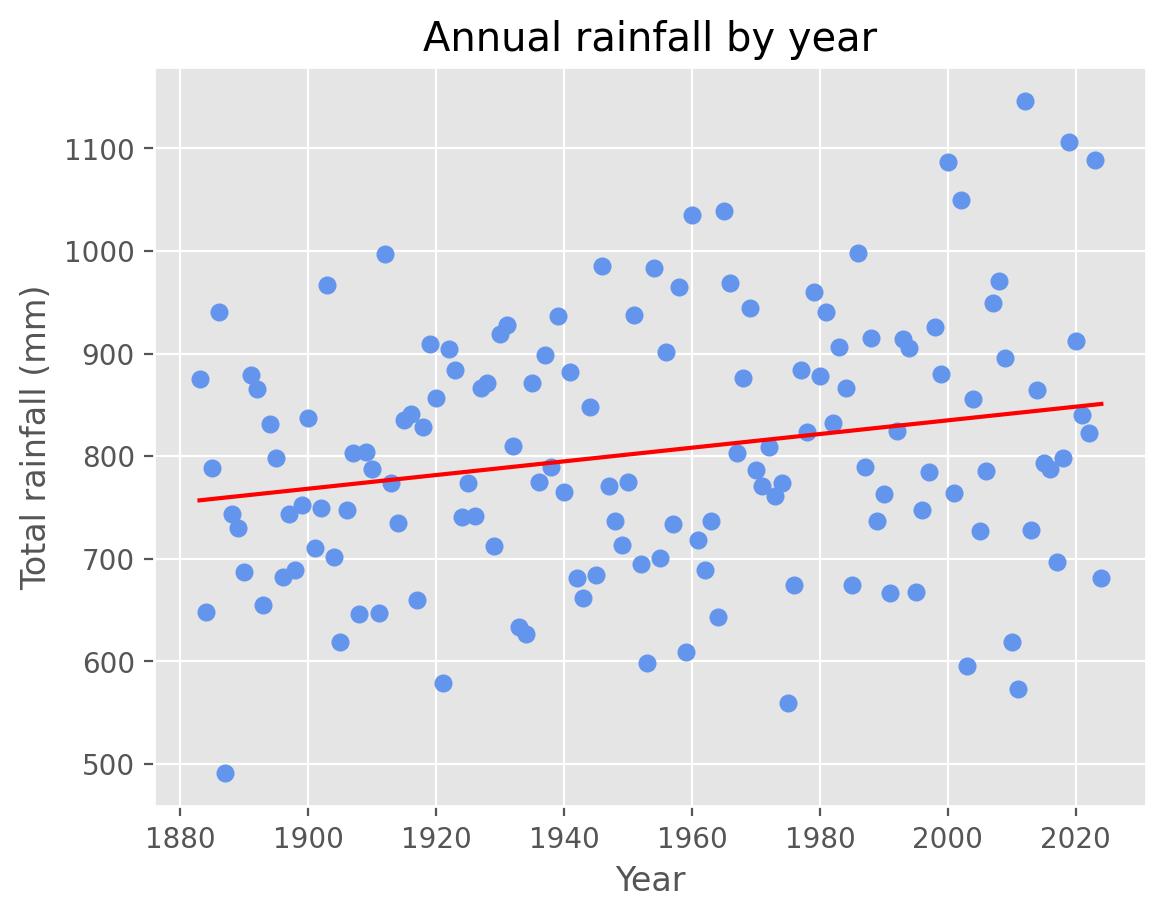

In [103]:
# plotting a scattergraph to show rainfall over time, with trend line
plt.scatter(a_wdata['yyyy'], a_wdata['rain-mm'], color = 'cornflowerblue')

# create the trend line
z = np.polyfit(a_wdata['yyyy'], a_wdata['rain-mm'], 1)
p = np.poly1d(z)
plt.plot(a_wdata['yyyy'], p(a_wdata['yyyy']),"r")
plt.title('Annual rainfall by year')
plt.xlabel('Year')
plt.ylabel('Total rainfall (mm)')
plt.show()

Visualising the annual rainfall data over time shows an upward trend and a greater variation in distribution as the years increase. 
This would indicate - again, unsuprisingly - that overall it is getting wetter and rainfall is increasing in unpredictability.

In [104]:
# create an array of 1-12, to represent all months
months = range(1,13)
month_data = []

# set some symbols to use for a visual representation of how monthly values compare to the annual figures
gt = '&#x1F53A;' # arrow up
lt = '&#x1F53B;' # arrow down
wetter = '&#x2614;' # umbrella open
drier = '&#x1F302;' # umbrella closed

# iterate months to gather stats on a month by month basis
for month in months:
    wdata_m = wdata[wdata['month'] == month]
    median_m = wdata_m['rain-mm'].median()
    mean_m = wdata_m['rain-mm'].mean()
    std_m = wdata_m['rain-mm'].std()
    interquartile_range_m = wdata_m['rain-mm'].quantile(0.75) - wdata_m['rain-mm'].quantile(0.25)
    month_data.append('|%s|%s %s|%s %s|%s %s|%s %s|' % (
        calendar.month_name[month],
        (wetter if median_m > median else drier),
        round(median_m, 2),
        (wetter if mean_m > mean else drier),
        round(mean_m, 2),
        (gt if std_m > std else lt),
        round(std_m, 2),
        (gt if interquartile_range_m > interquartile_range else lt),
        round(interquartile_range_m, 2)
    ))

# display month data in md table
display(Markdown("""
**Rainfall stats, per month**
| Month | Median (mm) | Mean (mm) | Standard deviation (mm) | Interquartile range (mm) |
| --- | --- | --- | --- | --- | 
%s"""% '\n'.join(month_data)))



**Rainfall stats, per month**
| Month | Median (mm) | Mean (mm) | Standard deviation (mm) | Interquartile range (mm) |
| --- | --- | --- | --- | --- | 
|January|&#x2614; 76.15|&#x2614; 79.12|&#x1F53B; 37.3|&#x1F53A; 49.62|
|February|&#x1F302; 58.85|&#x1F302; 65.04|&#x1F53A; 41.34|&#x1F53A; 51.72|
|March|&#x1F302; 56.5|&#x1F302; 60.57|&#x1F53B; 31.37|&#x1F53B; 39.6|
|April|&#x1F302; 49.45|&#x1F302; 54.43|&#x1F53B; 31.51|&#x1F53B; 40.05|
|May|&#x1F302; 56.7|&#x1F302; 58.79|&#x1F53B; 31.64|&#x1F53B; 40.67|
|June|&#x1F302; 50.05|&#x1F302; 58.73|&#x1F53A; 42.11|&#x1F53B; 47.25|
|July|&#x1F302; 57.05|&#x1F302; 63.01|&#x1F53B; 36.8|&#x1F53A; 49.95|
|August|&#x2614; 61.95|&#x1F302; 66.76|&#x1F53B; 35.52|&#x1F53B; 41.62|
|September|&#x1F302; 49.85|&#x1F302; 58.95|&#x1F53B; 37.73|&#x1F53A; 54.6|
|October|&#x2614; 67.6|&#x2614; 76.92|&#x1F53A; 39.82|&#x1F53A; 52.4|
|November|&#x2614; 71.4|&#x2614; 79.98|&#x1F53A; 41.15|&#x1F53A; 59.4|
|December|&#x2614; 78.2|&#x2614; 83.25|&#x1F53A; 41.08|&#x1F53A; 51.7|

Here we review the rainfall stats on a month by month basis. We look at the Median, Mean, Standard deviation and Interquartile range, noting which are greater (&#x1F53A;, &#x2614;) and less than (&#x1F53B;, &#x1F302;) those from the full dataset. 

January, October, November and December are wetter than average (indicated by both mean and median). August is also indicated as being wetter than average (indicated in median and not mean).

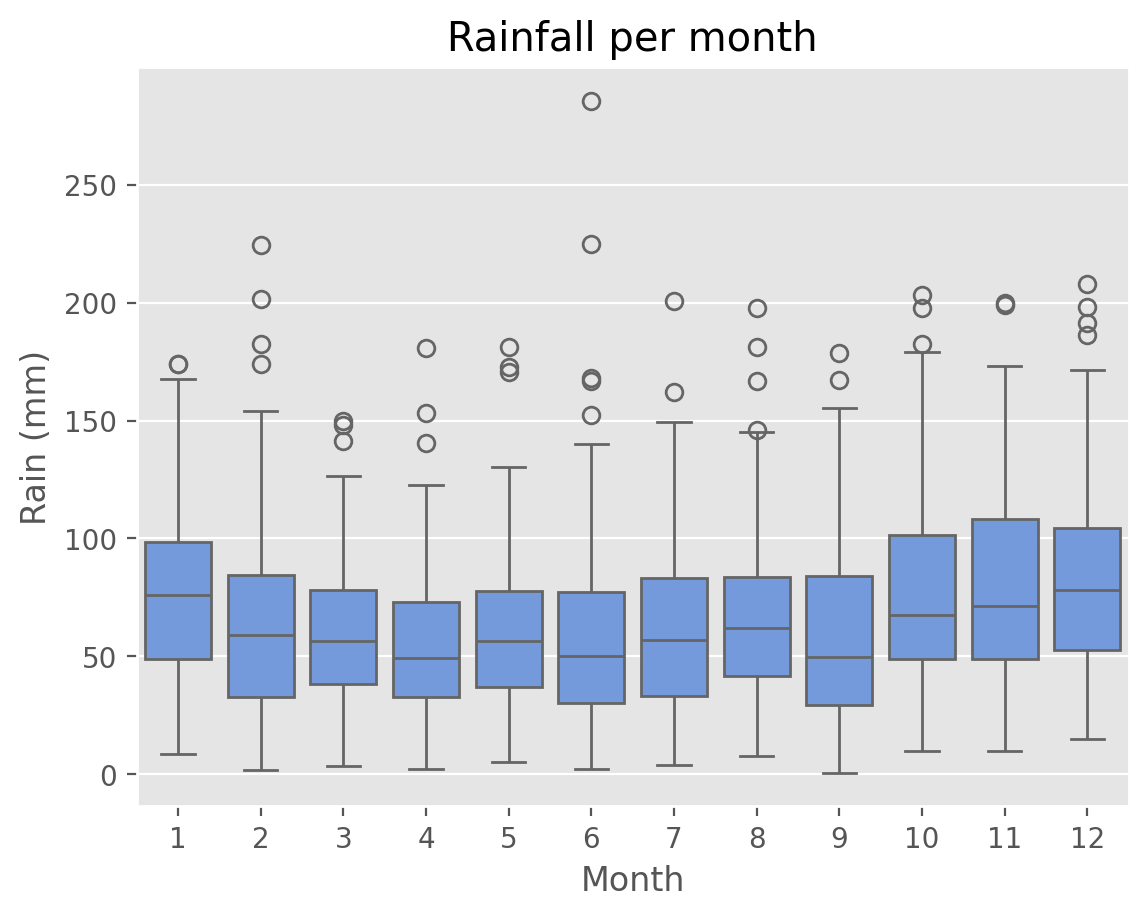

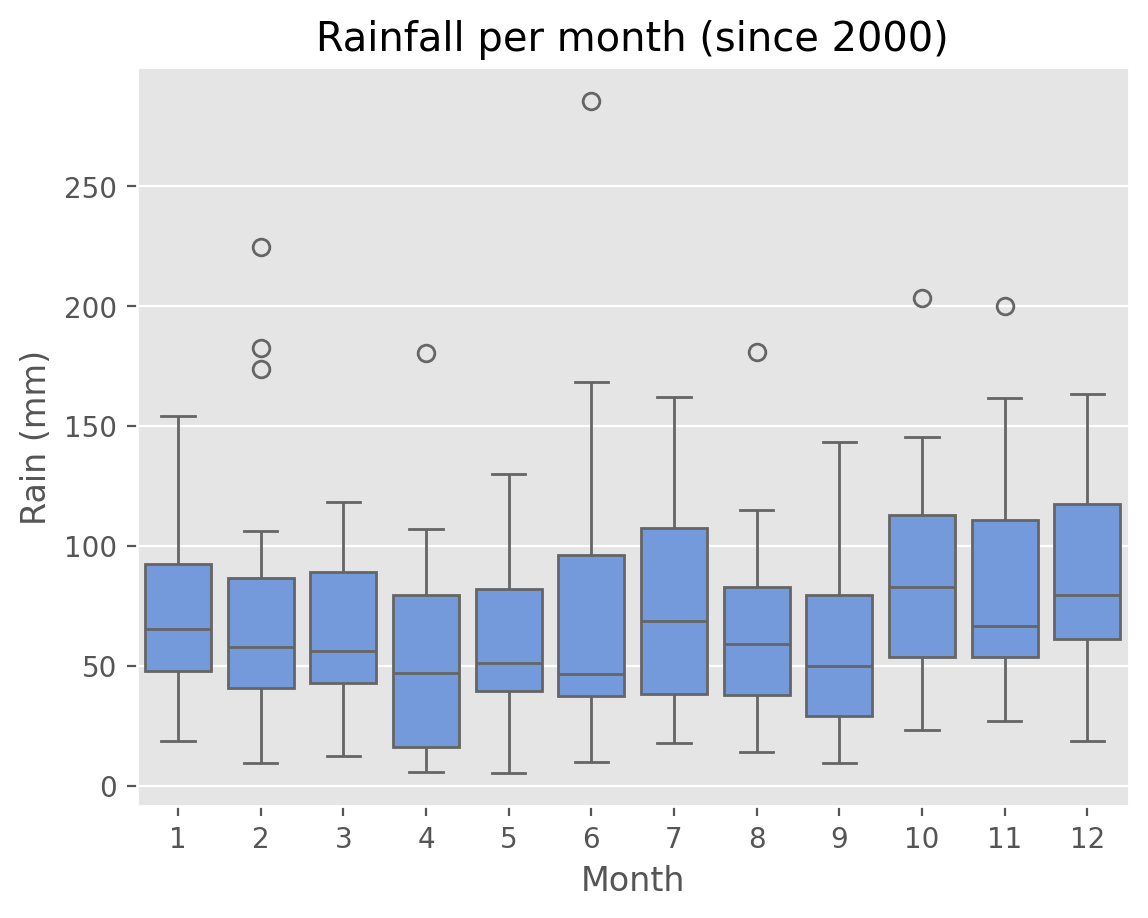

In [105]:
sns.boxplot(
    x = wdata['month'], y = wdata['rain-mm'], color='cornflowerblue'
).set(
    xlabel='Month', ylabel='Rain (mm)', title = 'Rainfall per month'
)
plt.show()
sns.boxplot(
    x = wdata[wdata['yyyy'] >= 2000]['month'], y = wdata[wdata['yyyy'] > 2000]['rain-mm'], color='cornflowerblue'
).set(
    xlabel='Month', ylabel='Rain (mm)', title = 'Rainfall per month (since 2000)'
)
plt.show()

The boxplots for *Rainfall per month* and *Rainfall per month (from 2000)* give good visualisation of some of the features of the dataset when analysing rainfall over month. 

Outliers are present in the dataset across all months of the year when looking at the first plot, although it's worth noting that this is over a *very* long time period. There are fewer outliers when looking at the data from the year 2000 onwards. Within this analysis the outliers indicate extreme rainfall events.

Although in the second plot we generally see a decrease in the length of the whiskers, both plots mostly show fairly long whiskers, in comparision to the interquartile range (the blue box), an indication of the variation in rainfall over months and time.